In [2]:
# Setup: carregar el CSV i preparar columnes útils
import pandas as pd
import numpy as np

# Llegeix el CSV. Nota: alguns camps són strings numèrics; els convertirem a numèrics.
#df = pd.read_csv('climate_change.csv')
df = pd.read_csv('climate_change_refact.csv')

print('Files, Columnes:', df.shape)
print('Columnes:', list(df.columns))
df.head(5)

Files, Columnes: (10000, 15)
Columnes: ['Year', 'Country', 'Region', 'Crop_Type', 'Average_Temperature_C', 'Total_Precipitation_mm', 'CO2_Emissions_MT', 'Crop_Yield_MT_per_HA', 'Extreme_Weather_Events', 'Irrigation_Access_%', 'Pesticide_Use_KG_per_HA', 'Fertilizer_Use_KG_per_HA', 'Soil_Health_Index', 'Adaptation_Strategies', 'Economic_Impact_Million_USD']


,Year,Country,Region,Crop_Type,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Adaptation_Strategies,Economic_Impact_Million_USD
0,1990,Argentina,Pampas,Wheat,15.540977,1406.121886,15.372830,4.874023,8,61.06,20.34,60.94,64.411328,No Adaptation,493.909028
1,1990,Argentina,Northeast,Fruits,15.382233,1493.707348,15.372098,5.585147,8,61.33,43.73,23.63,63.202583,Drought-resistant Crops,516.452620
2,1990,Argentina,Northeast,Corn,15.578721,1425.168718,15.358340,6.251538,0,97.23,37.02,51.92,62.451974,Crop Rotation,663.718193
3,1990,Argentina,Northeast,Coffee,15.797556,1591.371664,15.375439,6.886445,8,80.49,26.03,56.52,61.541225,No Adaptation,637.097038
4,1990,Argentina,Pampas,Coffee,15.358260,1846.561014,15.352097,7.369013,10,16.76,3.61,35.97,61.934624,Crop Rotation,430.361566


In [4]:
df_small = df.loc[:, ['Country']].copy()
df_small['Country'].unique()

array(['Argentina', 'Australia', 'Brazil', 'Canada', 'China', 'France',
       'India', 'Nigeria', 'Russia', 'USA'], dtype=object)

In [5]:
df_small_regions = df.loc[:, ['Region']].copy()
df_small_regions['Region'].unique()

array(['Pampas', 'Northeast', 'Patagonia', 'Northwest', 'New South Wales',
       'Western Australia', 'Victoria', 'Queensland', 'North', 'South',
       'Southeast', 'Quebec', 'British Columbia', 'Prairies', 'Ontario',
       'East', 'Central', 'Grand Est', 'Provence-Alpes-Cote d’Azur',
       'Nouvelle-Aquitaine', 'Ile-de-France', 'West Bengal', 'Punjab',
       'Tamil Nadu', 'Maharashtra', 'North West', 'South West',
       'South East', 'North Central', 'Siberian', 'Northwestern', 'Volga',
       'Midwest', 'West'], dtype=object)

In [6]:
mask0 = (df['Year'] == 2024) & (df['Country'] == 'Brazil')
filtered0 = df.loc[mask0, ['Year','Country','Region','Crop_Type','Average_Temperature_C','Adaptation_Strategies','Economic_Impact_Million_USD']]
print(filtered0.head(20))

      Year Country     Region   Crop_Type  Average_Temperature_C  \
2932  2024  Brazil  Southeast        Rice              15.846916   
2933  2024  Brazil      South        Rice              16.308052   
2934  2024  Brazil  Northeast       Wheat              16.288238   
2935  2024  Brazil      North      Coffee              16.437394   
2936  2024  Brazil  Southeast    Soybeans              15.918232   
2937  2024  Brazil  Southeast      Coffee              16.011840   
2938  2024  Brazil  Northeast        Rice              15.659356   
2939  2024  Brazil      South      Coffee              15.971109   
2940  2024  Brazil  Southeast      Cotton              16.318369   
2941  2024  Brazil  Northeast      Barley              15.952603   
2942  2024  Brazil  Northeast      Cotton              16.229347   
2943  2024  Brazil  Northeast        Corn              16.021601   
2944  2024  Brazil  Southeast        Corn              16.150241   
2945  2024  Brazil      South      Cotton       

In [7]:
#Filtra con booleanos
mask = (df['Year'] == 2024) & (df['Country'] == 'Brazil') & (df['Region'] == 'North') 
filtered = df.loc[mask, ['Year','Country','Region','Crop_Type','Average_Temperature_C','Adaptation_Strategies','Economic_Impact_Million_USD']]
print(filtered.head(20))

      Year Country Region  Crop_Type  Average_Temperature_C  \
2935  2024  Brazil  North     Coffee              16.437394   
2951  2024  Brazil  North     Cotton              16.263579   
2953  2024  Brazil  North   Soybeans              16.449478   
2955  2024  Brazil  North  Sugarcane              16.506067   

        Adaptation_Strategies  Economic_Impact_Million_USD  
2935  Drought-resistant Crops                      823.688  
2951         Water Management                      695.683  
2953            Crop Rotation                      883.592  
2955  Drought-resistant Crops                      756.707  


In [8]:
#Ordena por año
mask = (df['Country'] == 'Brazil') & (df['Region'] == 'North') 
filtered = df.loc[mask, ['Year','Country','Region','Crop_Type','Average_Temperature_C','Adaptation_Strategies','Economic_Impact_Million_USD']]
orden = filtered.sort_values(by=['Year'], ascending=[True])
orden.head(20)

,Year,Country,Region,Crop_Type,Average_Temperature_C,Adaptation_Strategies,Economic_Impact_Million_USD
2020,1990,Brazil,North,Cotton,15.404210,Organic Farming,413.444428
2028,1990,Brazil,North,Vegetables,15.441642,No Adaptation,643.793143
2034,1991,Brazil,North,Corn,15.674279,Water Management,719.051000
2037,1991,Brazil,North,Coffee,15.281986,Crop Rotation,894.101000
2039,1991,Brazil,North,Soybeans,14.966958,No Adaptation,803.728000
2041,1991,Brazil,North,Vegetables,15.306906,Drought-resistant Crops,726.285000
2042,1991,Brazil,North,Fruits,15.278205,Crop Rotation,924.145000
2043,1991,Brazil,North,Vegetables,15.447315,Water Management,905.957000
2044,1991,Brazil,North,Wheat,15.203622,Drought-resistant Crops,830.801000
2045,1991,Brazil,North,Cotton,15.689484,No Adaptation,889.983000


In [9]:
mask2 = (df['Year'] == 1990) & (df['Country'] == 'Brazil') & (df['Region'] == 'North') 
filtered2 = df.loc[mask2, ['Year','Country','Region','Crop_Type','Average_Temperature_C','Adaptation_Strategies','Economic_Impact_Million_USD']]
filtered2.head(20)

,Year,Country,Region,Crop_Type,Average_Temperature_C,Adaptation_Strategies,Economic_Impact_Million_USD
2020,1990,Brazil,North,Cotton,15.404210,Organic Farming,413.444428
2028,1990,Brazil,North,Vegetables,15.441642,No Adaptation,643.793143


In [10]:
mask3 = (df['Year'].isin([1990, 1995, 2000, 2005, 2011,2015, 2020, 2024])) & (df['Country'] == 'Brazil') & (df['Region'] == 'North')  & (df['Crop_Type'] == 'Wheat') 
filtered3 = df.loc[mask3, ['Year','Country','Region','Crop_Type','Average_Temperature_C','Adaptation_Strategies','Economic_Impact_Million_USD']]
orden2 = filtered3.sort_values(by=['Year'], ascending=[True])
orden2.head(20)

,Year,Country,Region,Crop_Type,Average_Temperature_C,Adaptation_Strategies,Economic_Impact_Million_USD
2163,1995,Brazil,North,Wheat,15.774264,Organic Farming,860.730
2311,2000,Brazil,North,Wheat,16.038030,Organic Farming,771.096
2446,2005,Brazil,North,Wheat,15.762783,No Adaptation,747.768
2581,2011,Brazil,North,Wheat,15.906516,Organic Farming,812.200
2709,2015,Brazil,North,Wheat,16.280080,Crop Rotation,917.750
2826,2020,Brazil,North,Wheat,16.300950,No Adaptation,828.272


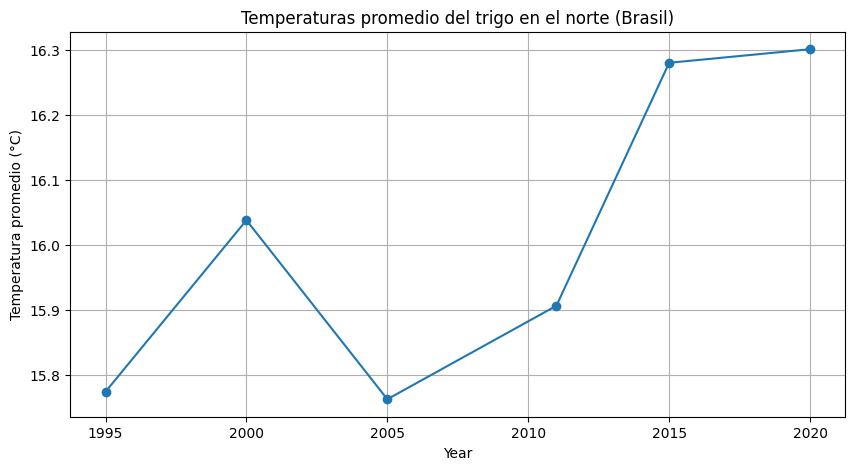

In [11]:
#Mostrar graficos comparativos entre 1990 - 2024
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(
    orden2['Year'],
    orden2['Average_Temperature_C'],
    marker='o'
)

plt.title('Temperaturas promedio del trigo en el norte (Brasil)')
plt.xlabel('Year')
plt.ylabel('Temperatura promedio (°C)')
plt.grid(True)

plt.show()

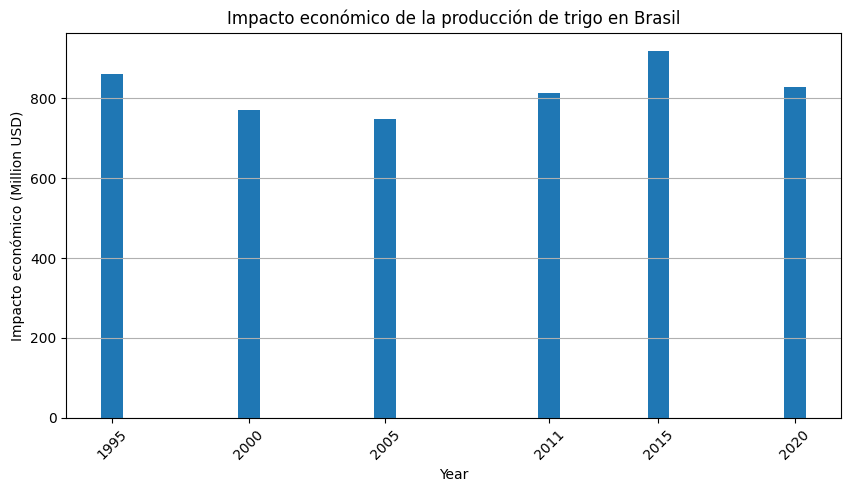

In [12]:
plt.figure(figsize=(10,5))
plt.bar(
    orden2['Year'],
    orden2['Economic_Impact_Million_USD']
)

plt.title('Impacto económico de la producción de trigo en Brasil')
plt.xlabel('Year')
plt.ylabel('Impacto económico (Million USD)')
plt.xticks(orden2['Year'], rotation=45)
plt.grid(axis='y')

plt.show()


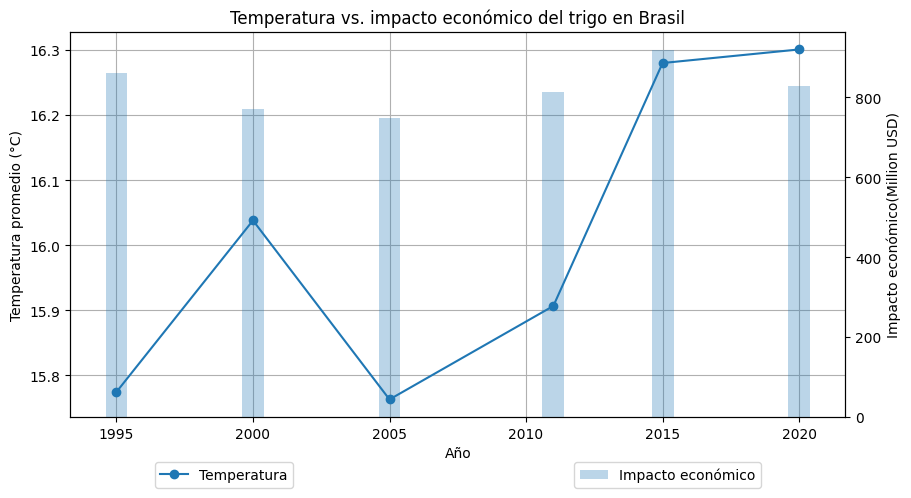

In [15]:
fig, ax1 = plt.subplots(figsize=(10,5))

# Temperatura
ax1.plot(
    orden2['Year'],
    orden2['Average_Temperature_C'],
    marker='o',
    label='Temperatura'
)
ax1.set_xlabel('Año')
ax1.set_ylabel('Temperatura promedio (°C)')
ax1.grid(True)
plt.legend(loc='upper left',bbox_to_anchor=(0.1, -0.1))

# Impacto económico
ax2 = ax1.twinx()
ax2.bar(
    orden2['Year'],
    orden2['Economic_Impact_Million_USD'],
    alpha=0.3,
    label='Impacto económico'
)
ax2.set_ylabel('Impacto económico(Million USD)')


plt.title('Temperatura vs. impacto económico del trigo en Brasil')
plt.legend(loc='upper right', bbox_to_anchor=(0.9, -0.1))
plt.show()